In [6]:
# loading libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline 

import os
print(os.listdir("."))
import warnings
warnings.filterwarnings("ignore")

['LSWMD.pkl', 'Untitled.ipynb', '.ipynb_checkpoints']


In [7]:
df=pd.read_pickle("LSWMD.pkl")

In [8]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [9]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


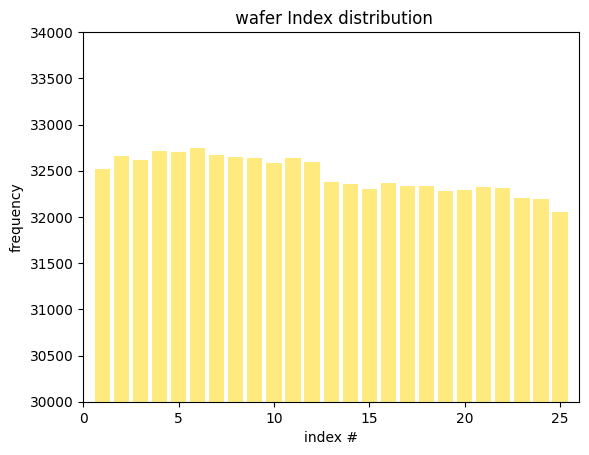

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline


uni_Index=np.unique(df.waferIndex, return_counts=True)
plt.bar(uni_Index[0],uni_Index[1], color='gold', align='center', alpha=0.5)
plt.title(" wafer Index distribution")
plt.xlabel("index #")
plt.ylabel("frequency")
plt.xlim(0,26)
plt.ylim(30000,34000)
plt.show()

In [11]:
df = df.drop(['waferIndex'], axis = 1)

In [12]:
def find_dim(x):
    dim0=np.size(x,axis=0)
    dim1=np.size(x,axis=1)
    return dim0,dim1
df['waferMapDim']=df.waferMap.apply(find_dim)
df.sample(5)

,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim
786445,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",953.0,lot46526,[[Test]],[[none]],"(33, 37)"
174730,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,...",1075.0,lot11166,[],[],"(38, 36)"
547876,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1513.0,lot34304,[],[],"(49, 39)"
389301,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3878.0,lot23348,[],[],"(88, 56)"
235157,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5633.0,lot14707,[],[],"(88, 81)"


In [13]:
max(df.waferMapDim), min(df.waferMapDim)

((300, 202), (6, 21))

In [14]:
uni_waferDim=np.unique(df.waferMapDim, return_counts=True)
uni_waferDim[0].shape[0]

632

In [15]:
df['failureType'] = df['failureType'].apply(lambda x: x[0][0] if len(x) > 0 and len(x[0]) > 0 else None)
df['trianTestLabel'] = df['trianTestLabel'].apply(lambda x: x[0][0] if len(x) > 0 and len(x[0]) > 0 else None)

In [16]:
df['failureNum'] = df.failureType
df['trainTestNum'] = df.trianTestLabel

mapping_type = {'Center':0,'Donut':1,'Edge-Loc':2,'Edge-Ring':3,'Loc':4,'Random':5,'Scratch':6,'Near-full':7,'none':8}
mapping_traintest = {'Training':0,'Test':1}

df = df.replace({'failureNum': mapping_type, 'trainTestNum': mapping_traintest})

In [17]:
print(df[['failureType', 'failureNum', 'trianTestLabel', 'trainTestNum']].head())

  failureType  failureNum trianTestLabel  trainTestNum
0        none         8.0       Training           0.0
1        none         8.0       Training           0.0
2        none         8.0       Training           0.0
3        none         8.0       Training           0.0
4        none         8.0       Training           0.0


In [18]:
tol_wafers = df.shape[0]
tol_wafers

811457

In [19]:
df_withlabel = df[(df['failureNum']>=0) & (df['failureNum']<=8)]
df_withlabel =df_withlabel.reset_index()
df_withpattern = df[(df['failureNum']>=0) & (df['failureNum']<=7)]
df_withpattern = df_withpattern.reset_index()
df_nonpattern = df[(df['failureNum']==8)]
df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0]

(172950, 25519, 147431)

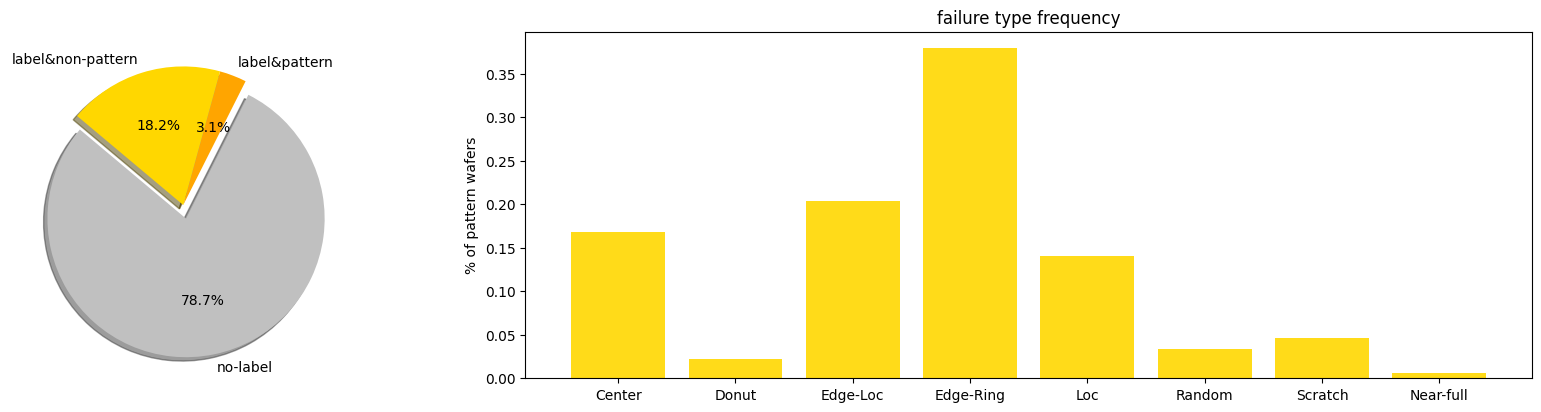

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import gridspec
fig = plt.figure(figsize=(20, 4.5)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2.5]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

no_wafers=[tol_wafers-df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0]]

colors = ['silver', 'orange', 'gold']
explode = (0.1, 0, 0)  # explode 1st slice
labels = ['no-label','label&pattern','label&non-pattern']
ax1.pie(no_wafers, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

uni_pattern=np.unique(df_withpattern.failureNum, return_counts=True)
labels2 = ['','Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']
ax2.bar(uni_pattern[0],uni_pattern[1]/df_withpattern.shape[0], color='gold', align='center', alpha=0.9)
ax2.set_title("failure type frequency")
ax2.set_ylabel("% of pattern wafers")
ax2.set_xticklabels(labels2)

plt.show()

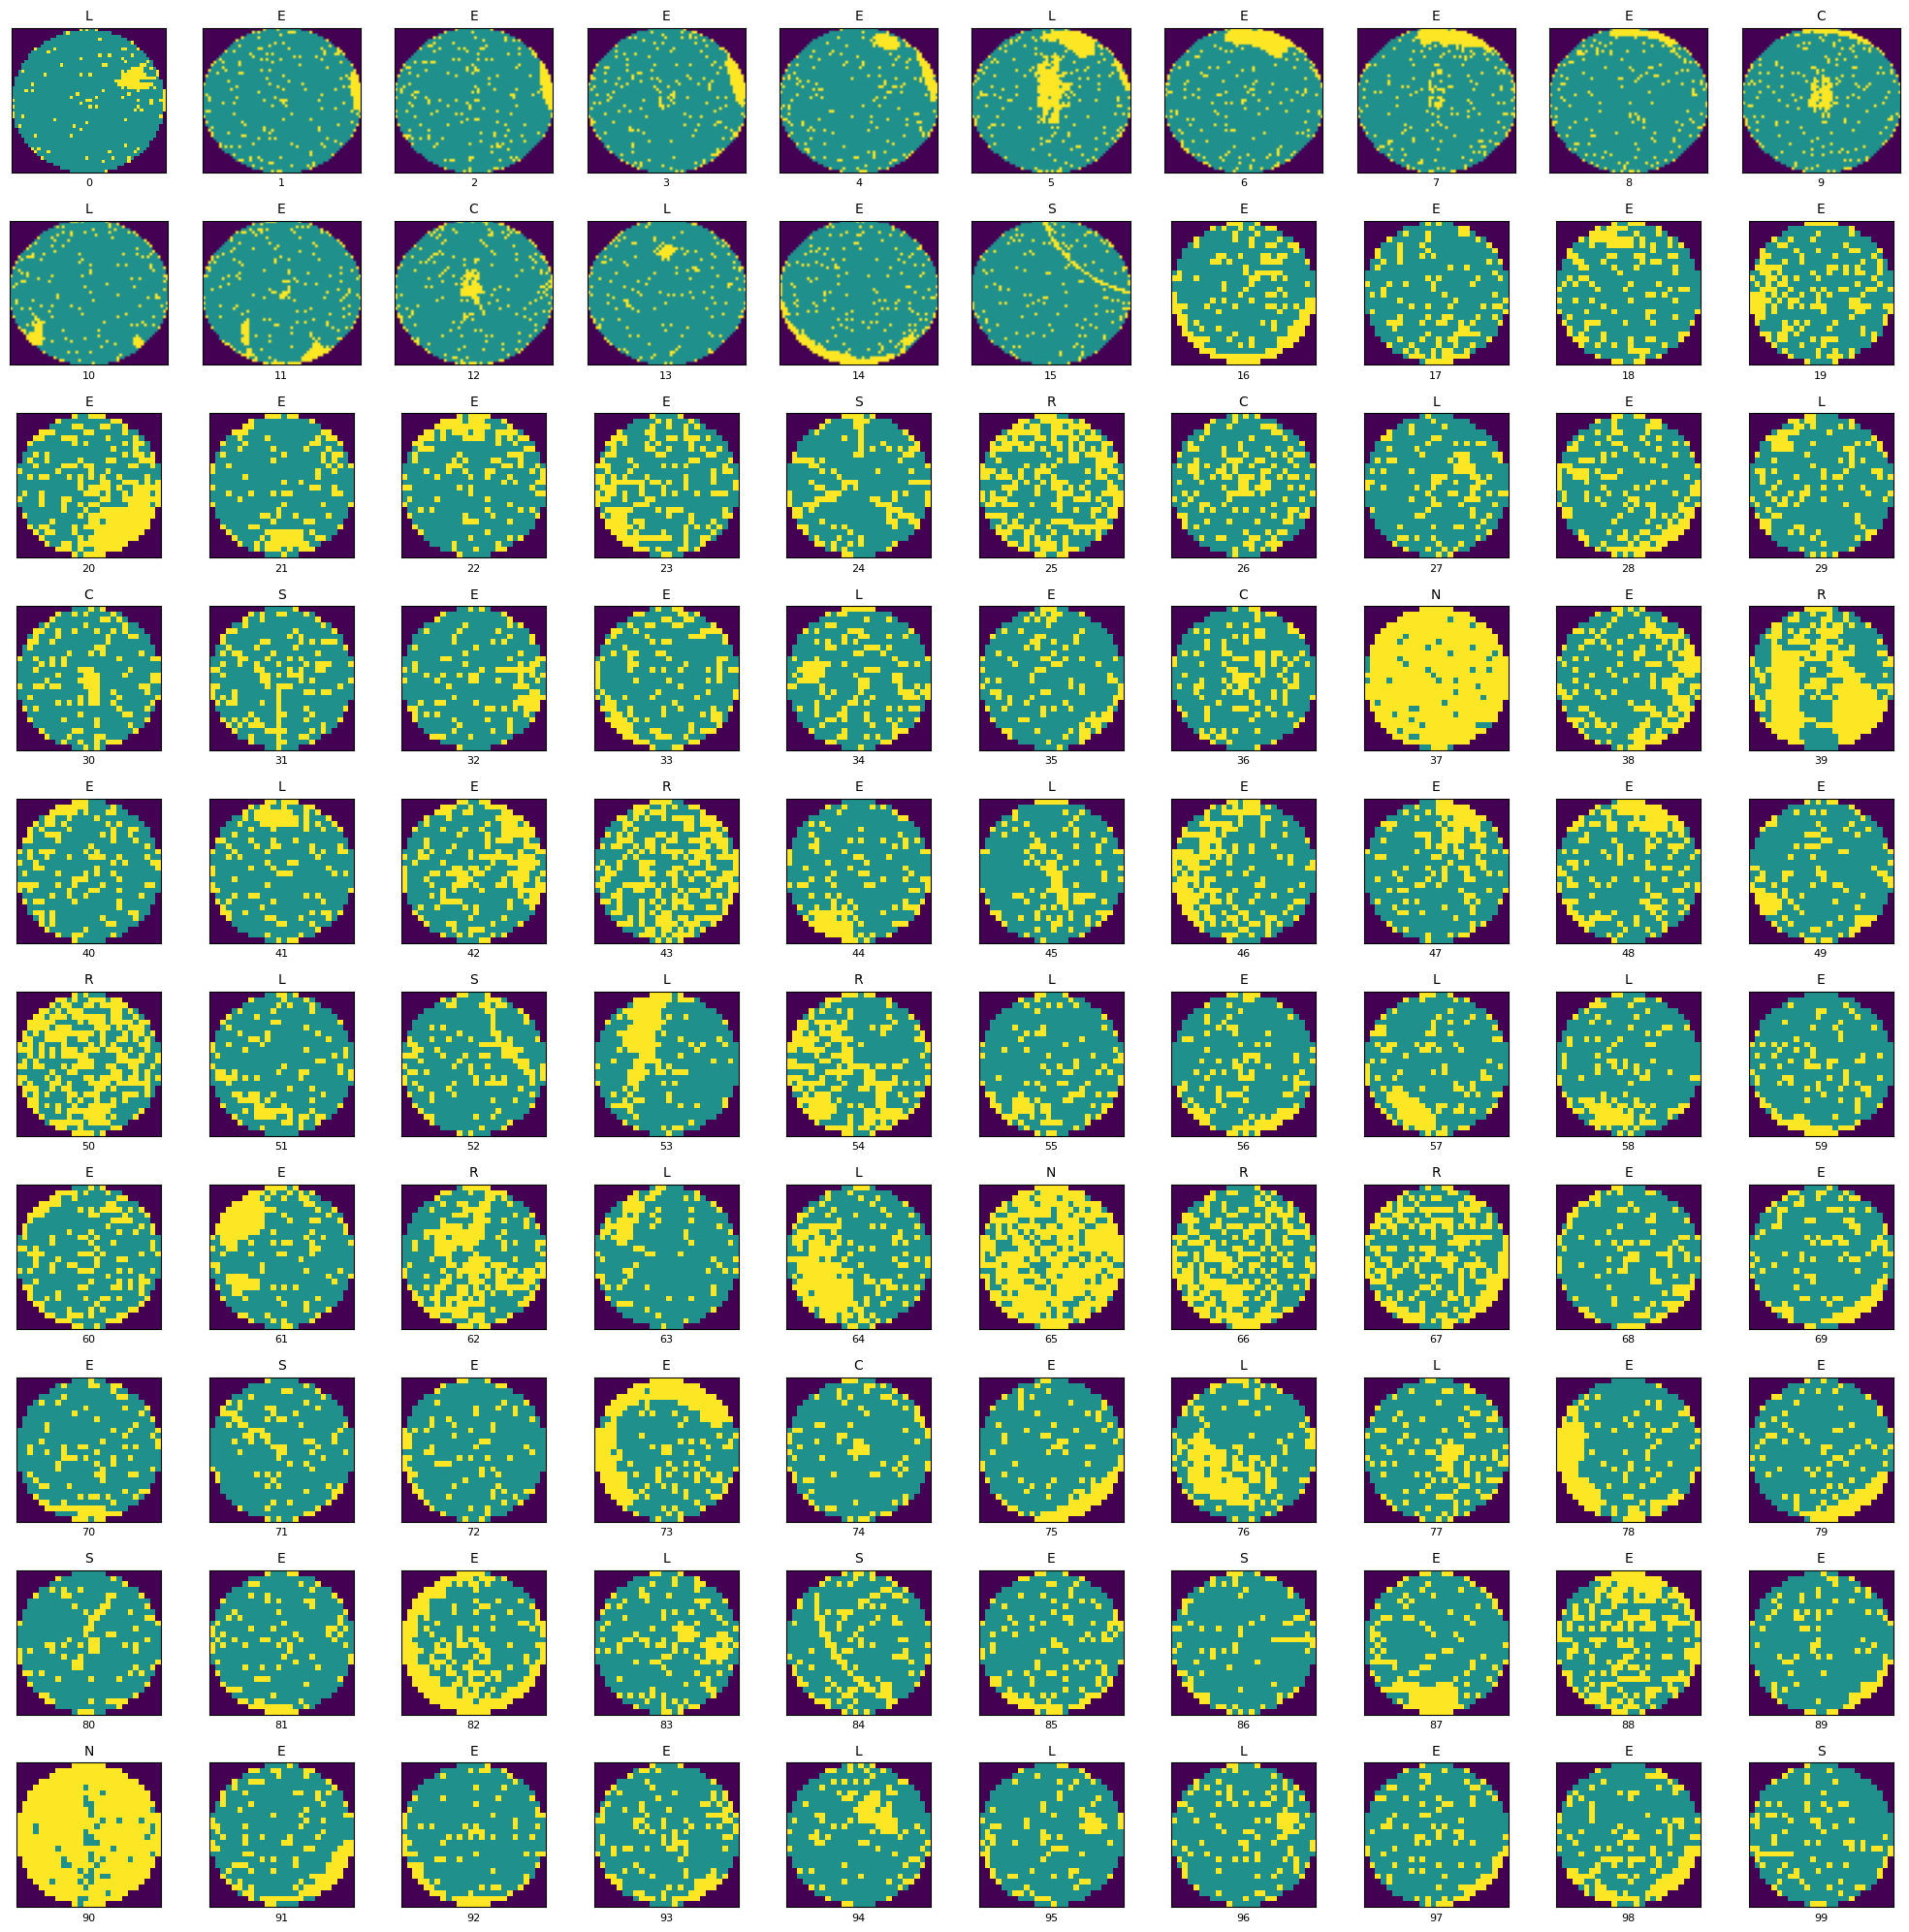

In [21]:
fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize=(20, 20))
ax = ax.ravel(order='C')
for i in range(100):
    img = df_withpattern.waferMap[i]
    ax[i].imshow(img)
    ax[i].set_title(df_withpattern.failureType[i][0][0], fontsize=10)
    ax[i].set_xlabel(df_withpattern.index[i], fontsize=8)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show()

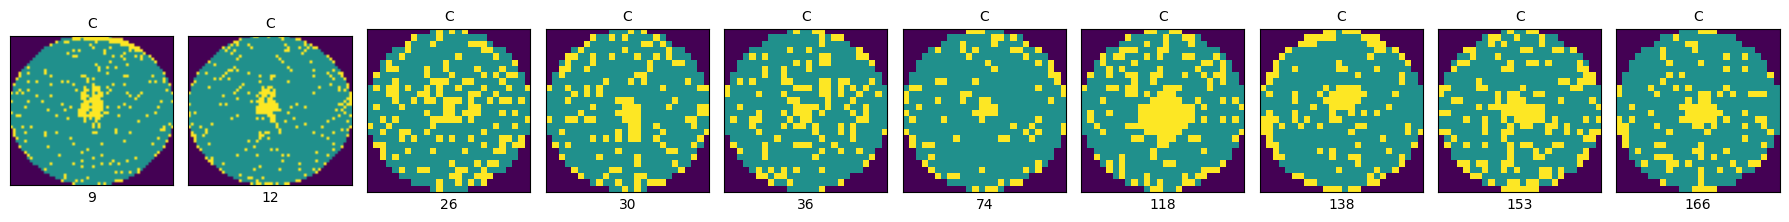

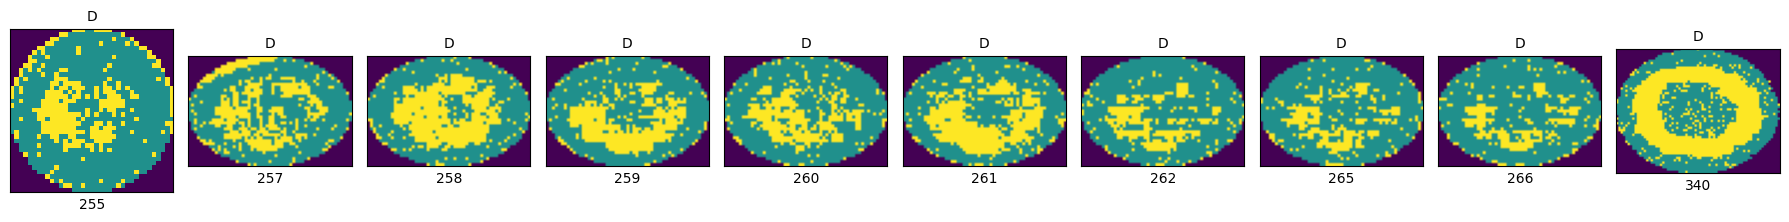

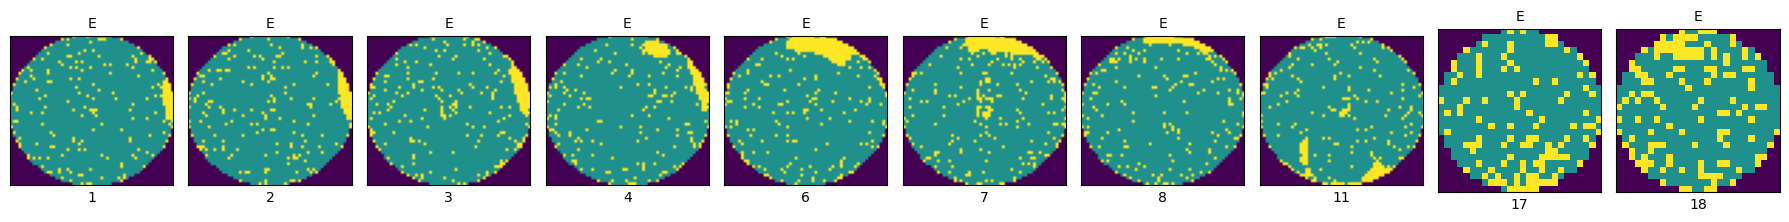

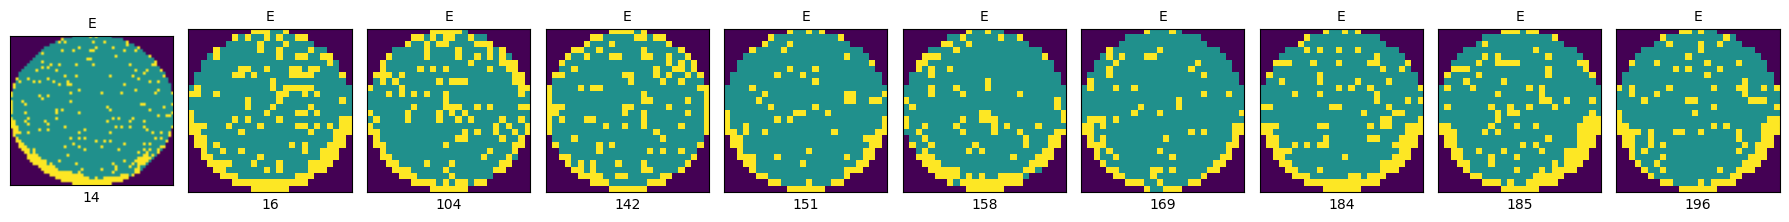

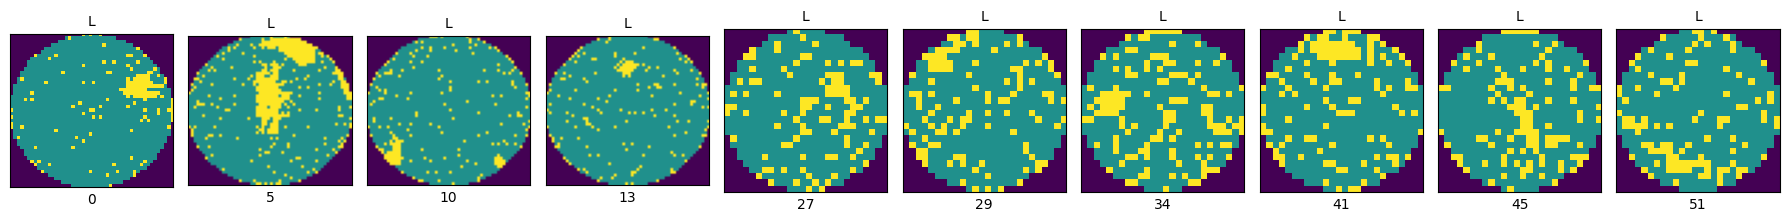

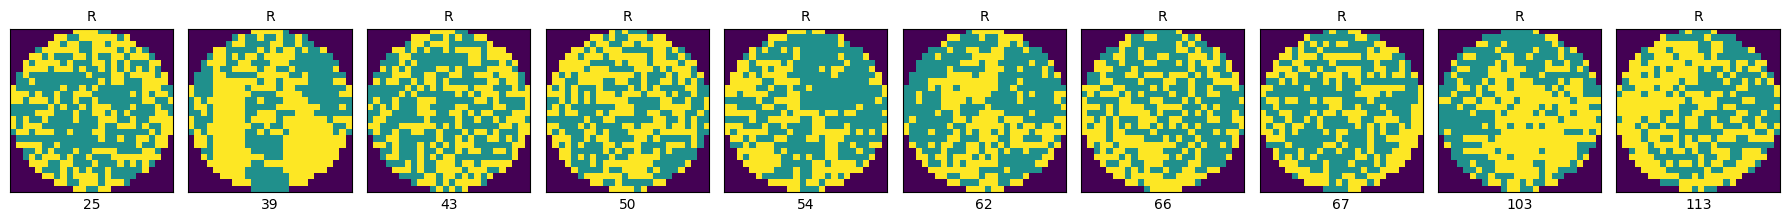

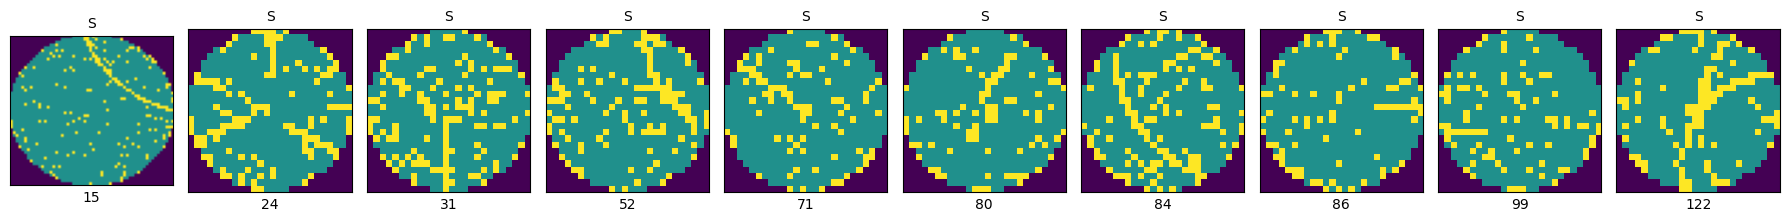

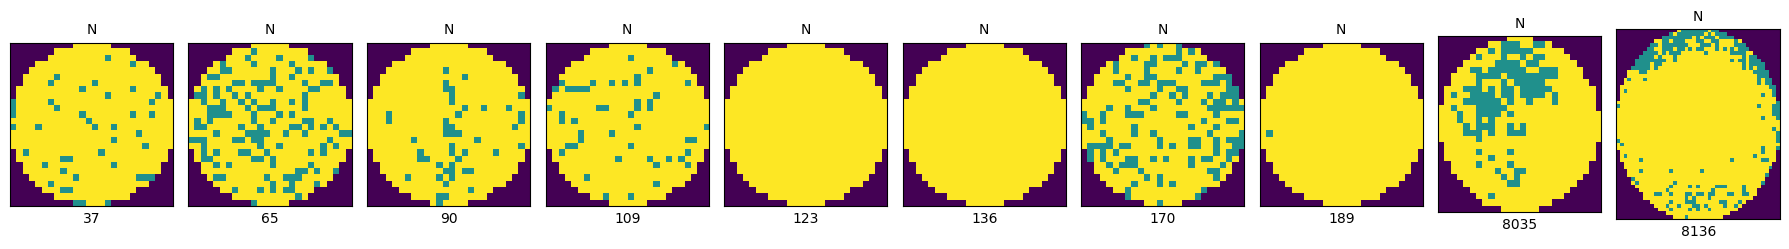

In [22]:
x = [0,1,2,3,4,5,6,7]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

for k in x:
    fig, ax = plt.subplots(nrows = 1, ncols = 10, figsize=(18, 12))
    ax = ax.ravel(order='C')
    for j in [k]:
        img = df_withpattern.waferMap[df_withpattern.failureType==labels2[j]]
        for i in range(10):
            ax[i].imshow(img[img.index[i]])
            ax[i].set_title(df_withpattern.failureType[img.index[i]][0][0], fontsize=10)
            ax[i].set_xlabel(df_withpattern.index[img.index[i]], fontsize=10)
            ax[i].set_xticks([])
            ax[i].set_yticks([])
    plt.tight_layout()
    plt.show() 

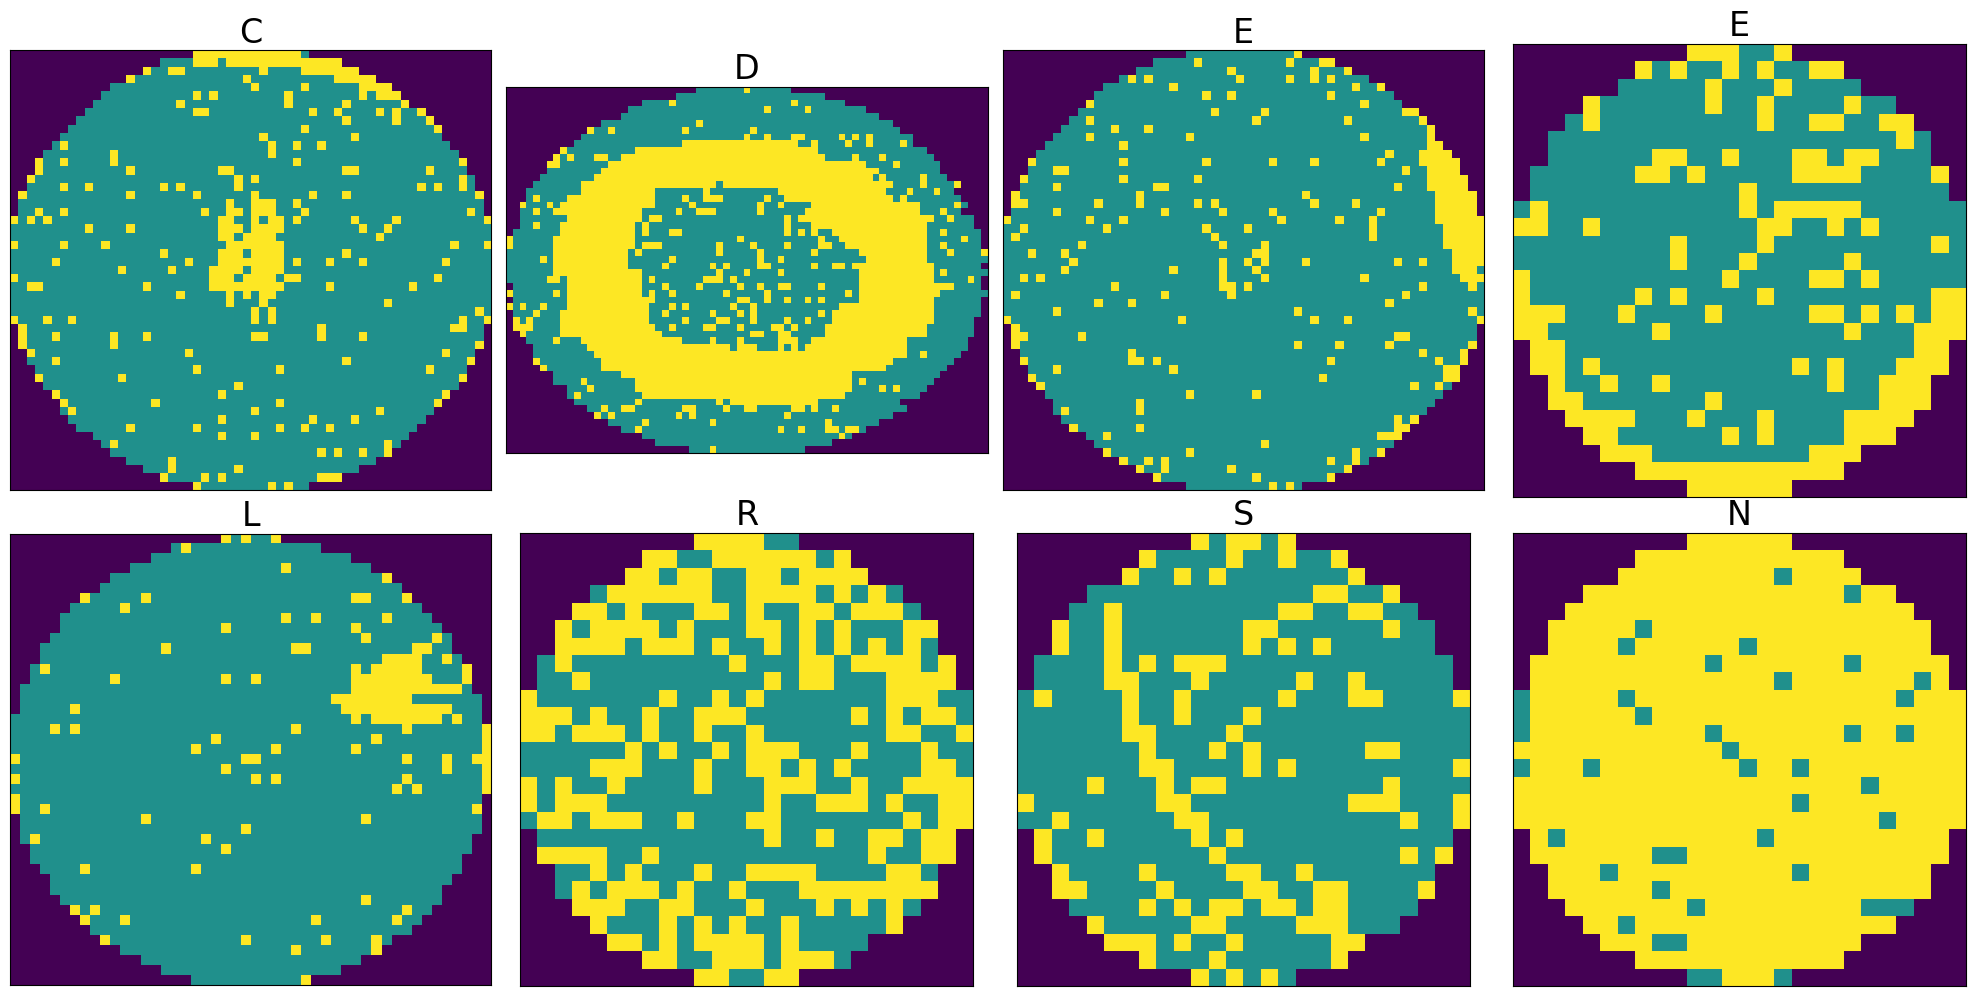

In [23]:
x = [9,340, 3, 16, 0, 25, 84, 37]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

#ind_def = {'Center': 9, 'Donut': 340, 'Edge-Loc': 3, 'Edge-Ring': 16, 'Loc': 0, 'Random': 25,  'Scratch': 84, 'Near-full': 37}
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(20, 10))
ax = ax.ravel(order='C')
for i in range(8):
    img = df_withpattern.waferMap[x[i]]
    ax[i].imshow(img)
    ax[i].set_title(df_withpattern.failureType[x[i]][0][0],fontsize=24)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show() 

In [24]:
# loading libraries
import skimage
from skimage import measure
from skimage.transform import radon
from skimage.transform import probabilistic_hough_line
from skimage import measure
from scipy import interpolate
from scipy import stats

In [25]:
import skimage
from skimage import measure
from skimage.transform import radon
from skimage.transform import probabilistic_hough_line
from skimage import measure
from scipy import interpolate
from scipy import stats

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


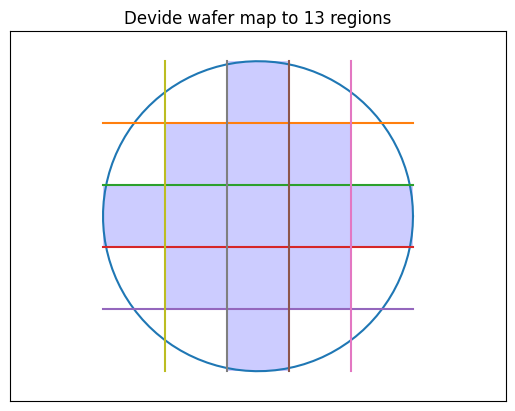

In [26]:
an=np.linspace(0, 2*np.pi, 100)                     # 원 100개의 점 
plt.plot(2.5*np.cos(an), 2.5*np.sin(an))            # 반지름 2.5인 원 그리기 
plt.axis('equal')
plt.axis([-4,4,-4,4])                               # 축 길이 똑같이 

# 가로선 그리기 
plt.plot([-2.5, 2.5], [1.5, 1.5])
plt.plot([-2.5, 2.5], [0.5, 0.5 ])
plt.plot([-2.5, 2.5], [-0.5, -0.5 ])
plt.plot([-2.5, 2.5], [-1.5,-1.5 ])

# 세로선 그리기 
plt.plot([0.5, 0.5], [-2.5, 2.5])
plt.plot([1.5, 1.5], [-2.5, 2.5])
plt.plot([-0.5, -0.5], [-2.5, 2.5])
plt.plot([-1.5, -1.5], [-2.5, 2.5])

# 색칠하기 
for i in range(-1, 2):  # x축 범위: -1, 0, 1
    for j in range(-1, 2):  # y축 범위: -1, 0, 1
        x = [i - 0.5, i + 0.5, i + 0.5, i - 0.5]
        y = [j - 0.5, j - 0.5, j + 0.5, j + 0.5]
        plt.fill(x, y, 'blue', alpha=0.2)

x = [-0.5, 0.5, 0.5, -0.5]
y = [1.5, 1.5, 2.5, 2.5]
plt.fill(x, y, 'blue', alpha=0.2) 
x = [-0.5, 0.5, 0.5, -0.5]
y = [-1.5, -1.5, -2.5, -2.5]
plt.fill(x, y, 'blue', alpha=0.2) 
y = [-0.5, 0.5, 0.5, -0.5]
x = [-1.5, -1.5, -2.5, -2.5]
plt.fill(x, y, 'blue', alpha=0.2) 
y = [-0.5, 0.5, 0.5, -0.5]
x = [1.5, 1.5, 2.5, 2.5]
plt.fill(x, y, 'blue', alpha=0.2) 


plt.title("Devide wafer map to 13 regions")
plt.xticks([]) # 축 없애기
plt.yticks([])
plt.show()

In [27]:
def cal_den(x):
    return 100*(np.sum(x==2)/np.size(x))  

def find_regions(x):
    rows=np.size(x,axis=0)
    cols=np.size(x,axis=1)
    ind1=np.arange(0,rows,rows//5)
    ind2=np.arange(0,cols,cols//5)
    
    reg1=x[ind1[0]:ind1[1],:]
    reg3=x[ind1[4]:,:]
    reg4=x[:,ind2[0]:ind2[1]]
    reg2=x[:,ind2[4]:]

    reg5=x[ind1[1]:ind1[2],ind2[1]:ind2[2]]
    reg6=x[ind1[1]:ind1[2],ind2[2]:ind2[3]]
    reg7=x[ind1[1]:ind1[2],ind2[3]:ind2[4]]
    reg8=x[ind1[2]:ind1[3],ind2[1]:ind2[2]]
    reg9=x[ind1[2]:ind1[3],ind2[2]:ind2[3]]
    reg10=x[ind1[2]:ind1[3],ind2[3]:ind2[4]]
    reg11=x[ind1[3]:ind1[4],ind2[1]:ind2[2]]
    reg12=x[ind1[3]:ind1[4],ind2[2]:ind2[3]]
    reg13=x[ind1[3]:ind1[4],ind2[3]:ind2[4]]
    
    fea_reg_den = []
    fea_reg_den = [cal_den(reg1),cal_den(reg2),cal_den(reg3),cal_den(reg4),cal_den(reg5),cal_den(reg6),cal_den(reg7),cal_den(reg8),cal_den(reg9),cal_den(reg10),cal_den(reg11),cal_den(reg12),cal_den(reg13)]
    return fea_reg_den

In [28]:
df_withpattern['fea_reg']=df_withpattern.waferMap.apply(find_regions)

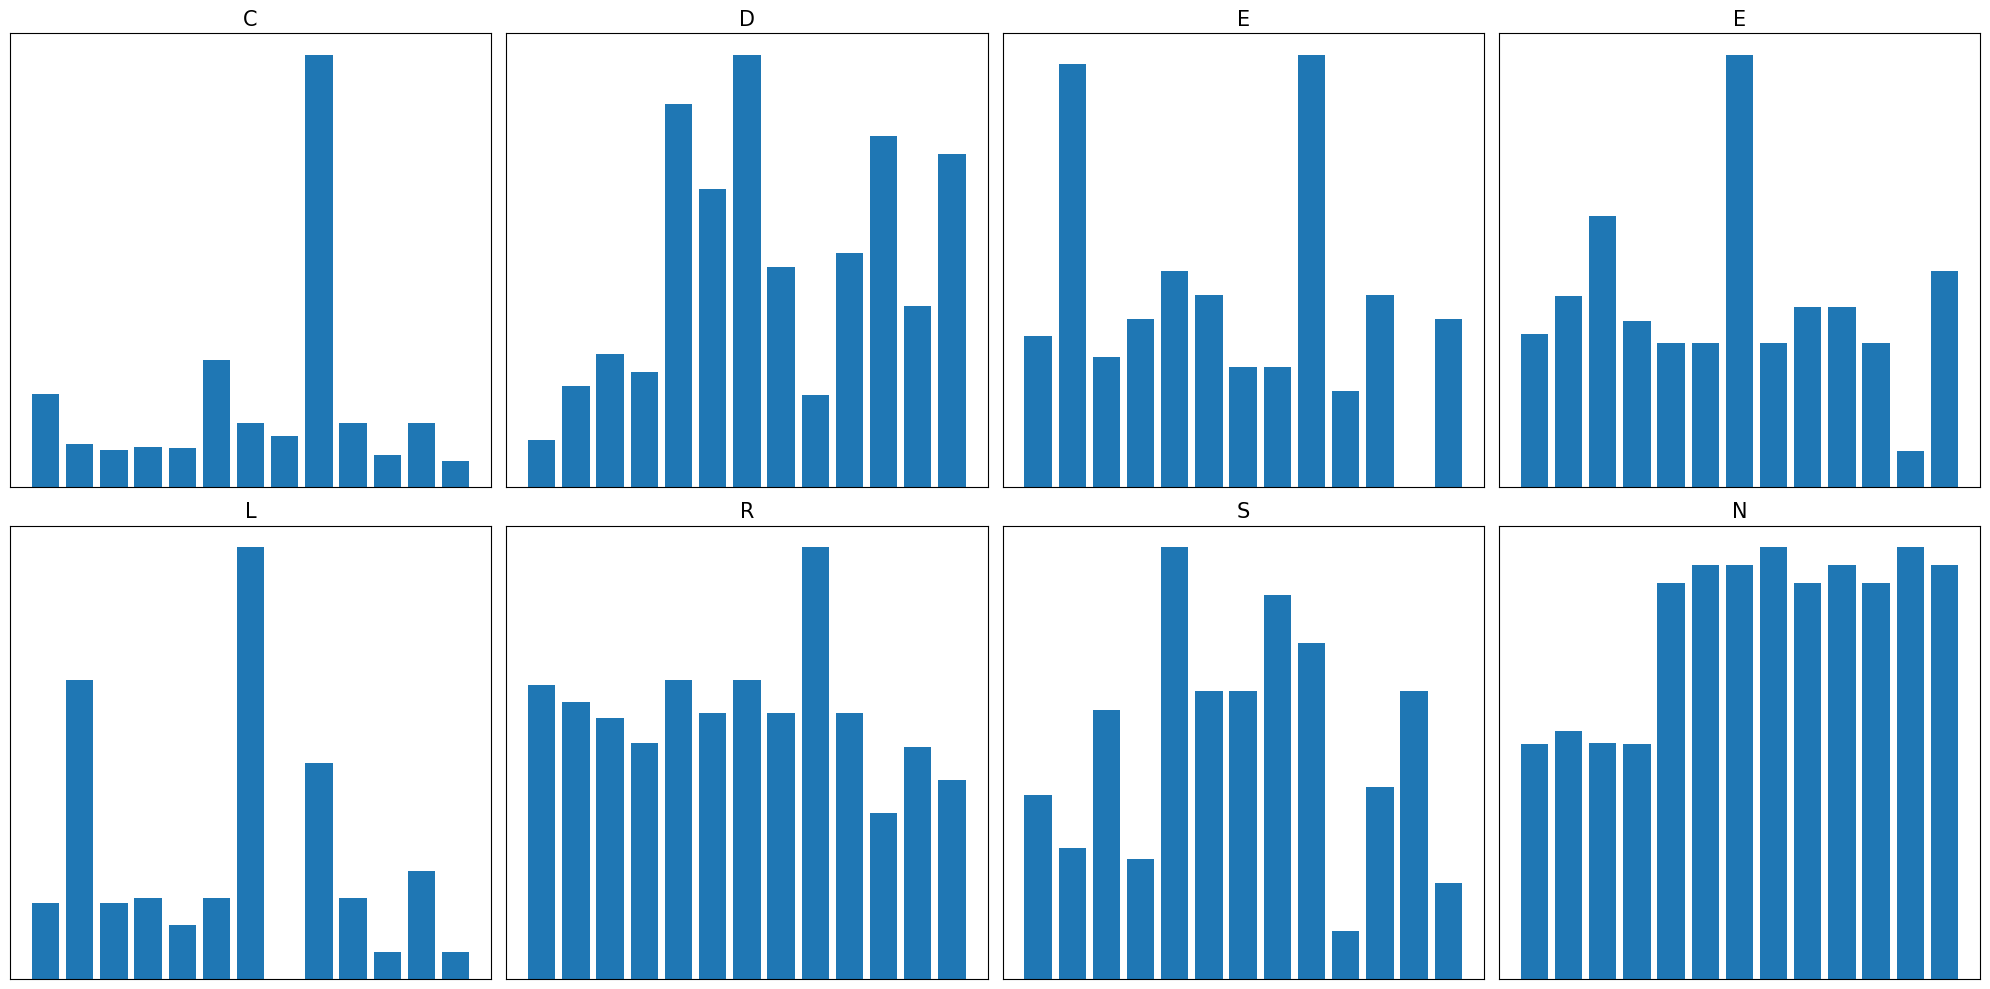

In [29]:
x = [9,340, 3, 16, 0, 25, 84, 37]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

fig, ax = plt.subplots(nrows = 2, ncols = 4,figsize=(20, 10))
ax = ax.ravel(order='C')
for i in range(8):
    ax[i].bar(np.linspace(1,13,13),df_withpattern.fea_reg[x[i]])
    ax[i].set_title(df_withpattern.failureType[x[i]][0][0],fontsize=15)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.tight_layout()
plt.show() 

In [30]:
def change_val(img):
    img[img==1] =0  
    return img

df_withpattern_copy = df_withpattern.copy()
df_withpattern_copy['new_waferMap'] =df_withpattern_copy.waferMap.apply(change_val)

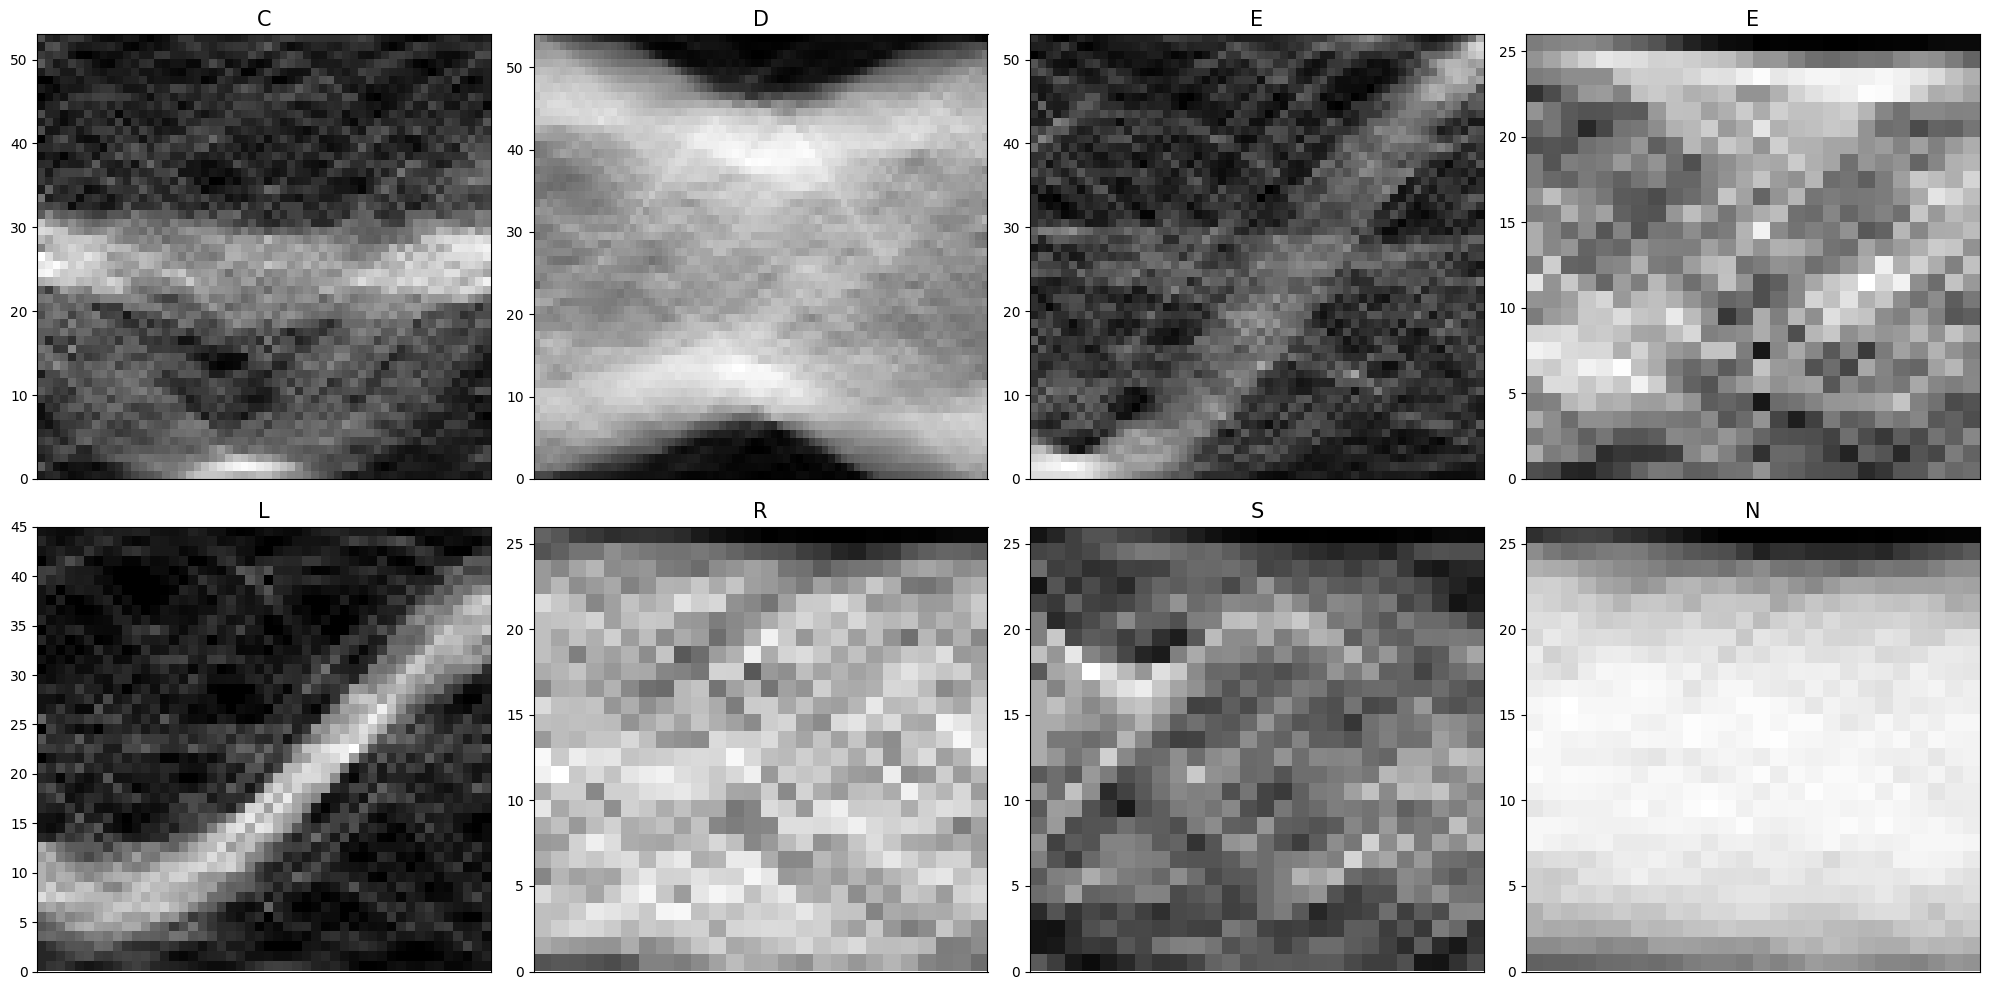

In [31]:
x = [9,340, 3, 16, 0, 25, 84, 37]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(20, 10))
ax = ax.ravel(order='C')
for i in range(8):
    img = df_withpattern_copy.waferMap[x[i]]
    theta = np.linspace(0., 180., max(img.shape), endpoint=False)
    sinogram = radon(img, theta=theta)    
      
    ax[i].imshow(sinogram, cmap=plt.cm.Greys_r, extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')
    ax[i].set_title(df_withpattern_copy.failureType[x[i]][0][0],fontsize=15)
    ax[i].set_xticks([])
plt.tight_layout()

plt.show()

In [32]:
def cubic_inter_mean(img):
    theta = np.linspace(0., 180., max(img.shape), endpoint=False)
    sinogram = radon(img, theta=theta)
    xMean_Row = np.mean(sinogram, axis = 1)
    x = np.linspace(1, xMean_Row.size, xMean_Row.size)
    y = xMean_Row
    f = interpolate.interp1d(x, y, kind = 'cubic')
    xnew = np.linspace(1, xMean_Row.size, 20)
    ynew = f(xnew)/100   # use interpolation function returned by `interp1d`
    return ynew

def cubic_inter_std(img):
    theta = np.linspace(0., 180., max(img.shape), endpoint=False)
    sinogram = radon(img, theta=theta)
    xStd_Row = np.std(sinogram, axis=1)
    x = np.linspace(1, xStd_Row.size, xStd_Row.size)
    y = xStd_Row
    f = interpolate.interp1d(x, y, kind = 'cubic')
    xnew = np.linspace(1, xStd_Row.size, 20)
    ynew = f(xnew)/100   # use interpolation function returned by `interp1d`
    return ynew  

In [33]:
df_withpattern_copy['fea_cub_mean'] =df_withpattern_copy.waferMap.apply(cubic_inter_mean)
df_withpattern_copy['fea_cub_std'] =df_withpattern_copy.waferMap.apply(cubic_inter_std)

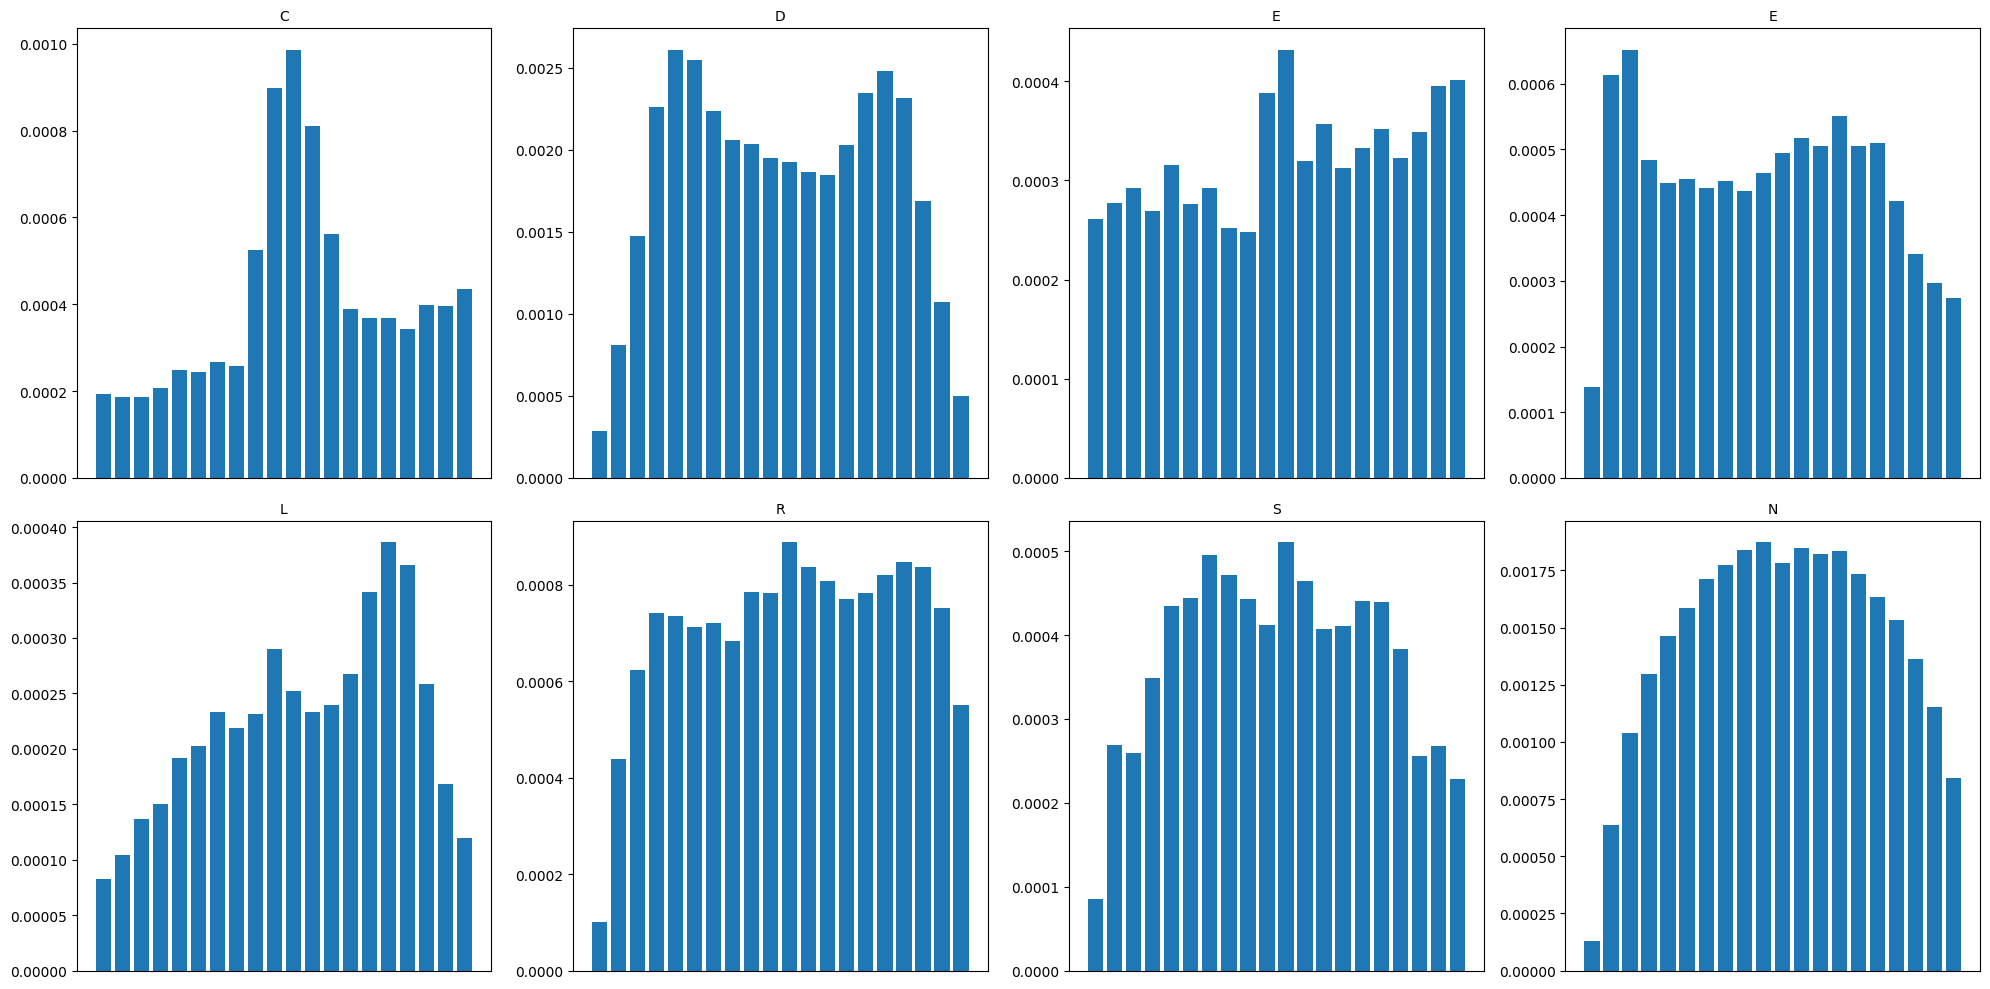

In [34]:
x = [9, 340, 3, 16, 0, 25, 84, 37]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

fig, ax = plt.subplots(nrows = 2, ncols = 4,figsize=(20, 10))
ax = ax.ravel(order='C')
for i in range(8):
    ax[i].bar(np.linspace(1,20,20),df_withpattern_copy.fea_cub_mean[x[i]])
    ax[i].set_title(df_withpattern_copy.failureType[x[i]][0][0],fontsize=10)
    ax[i].set_xticks([])
    # ax[i].set_xlim([0,21])   
    # ax[i].set_ylim([0,1])
plt.tight_layout()
plt.show() 

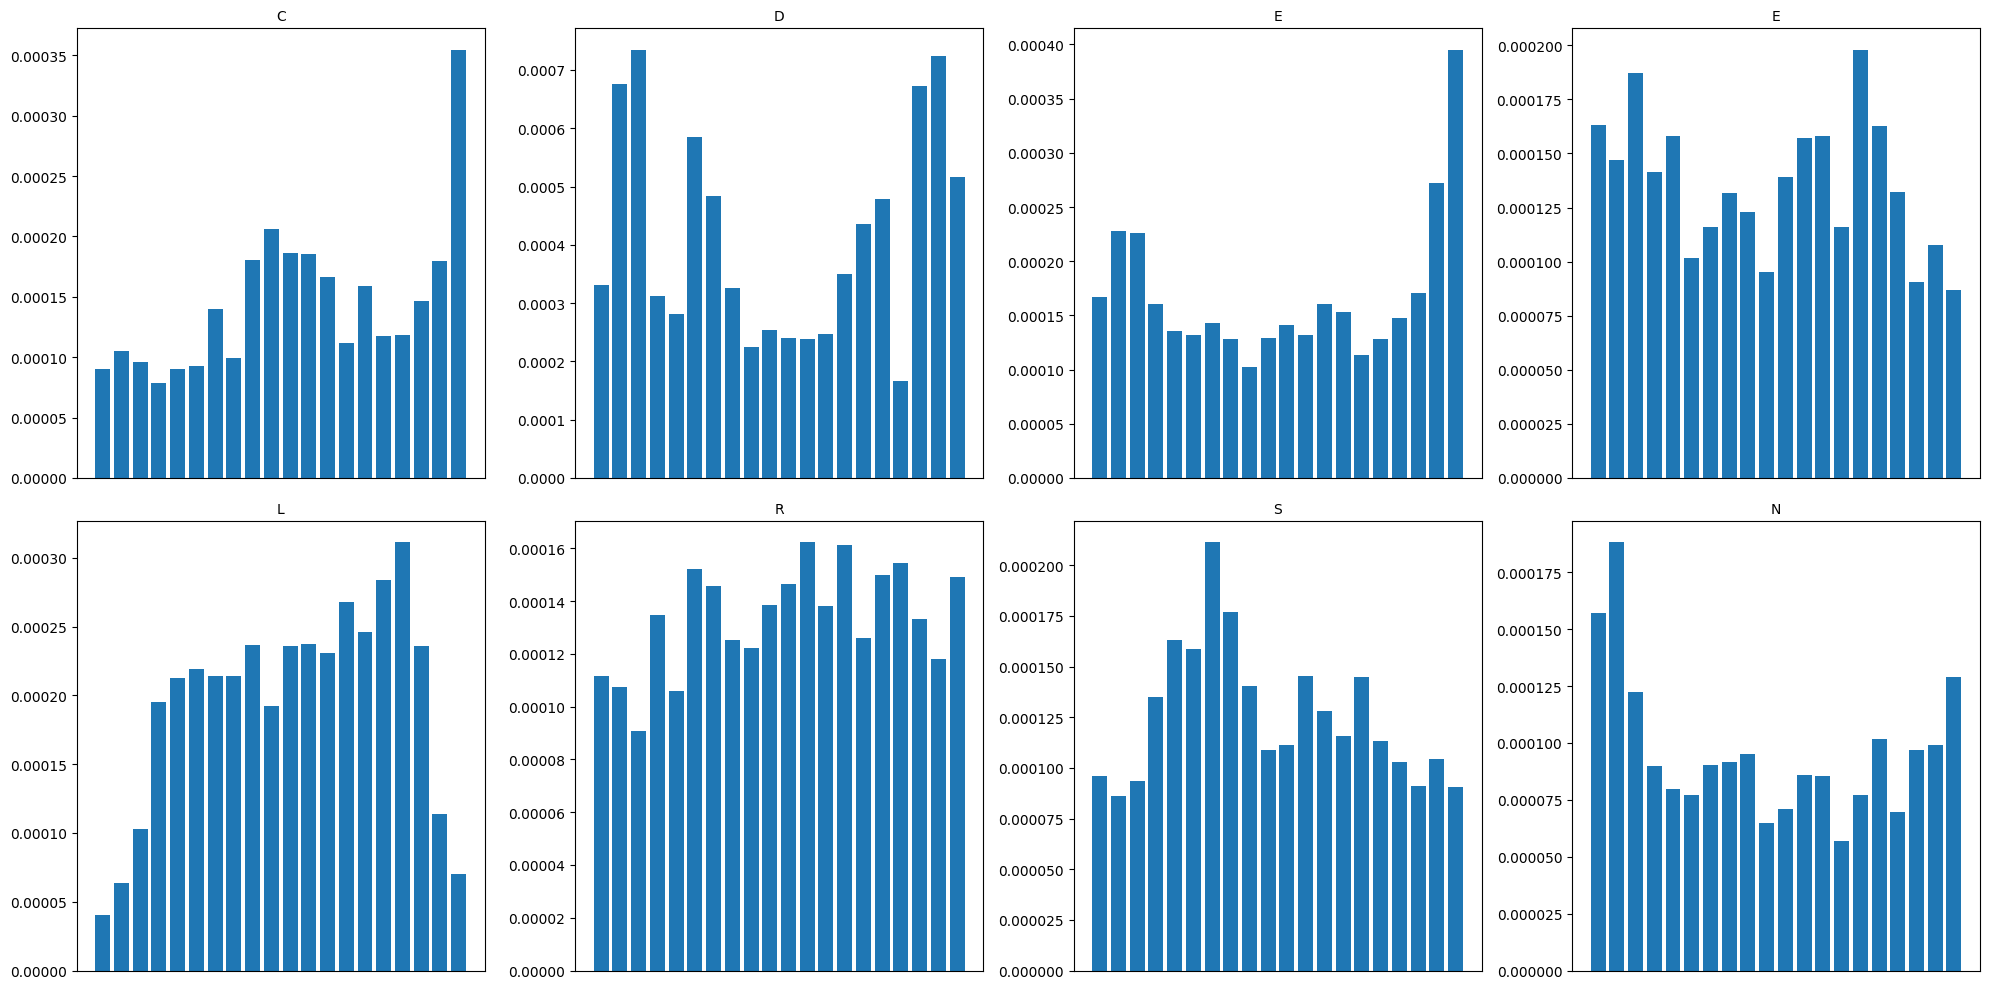

In [35]:
fig, ax = plt.subplots(nrows = 2, ncols = 4,figsize=(20, 10))
ax = ax.ravel(order='C')
for i in range(8):
    ax[i].bar(np.linspace(1,20,20),df_withpattern_copy.fea_cub_std[x[i]])
    ax[i].set_title(df_withpattern_copy.failureType[x[i]][0][0],fontsize=10)
    ax[i].set_xticks([])
    # ax[i].set_xlim([0,21])   
    # ax[i].set_ylim([0,0.3])
plt.tight_layout()
plt.show() 

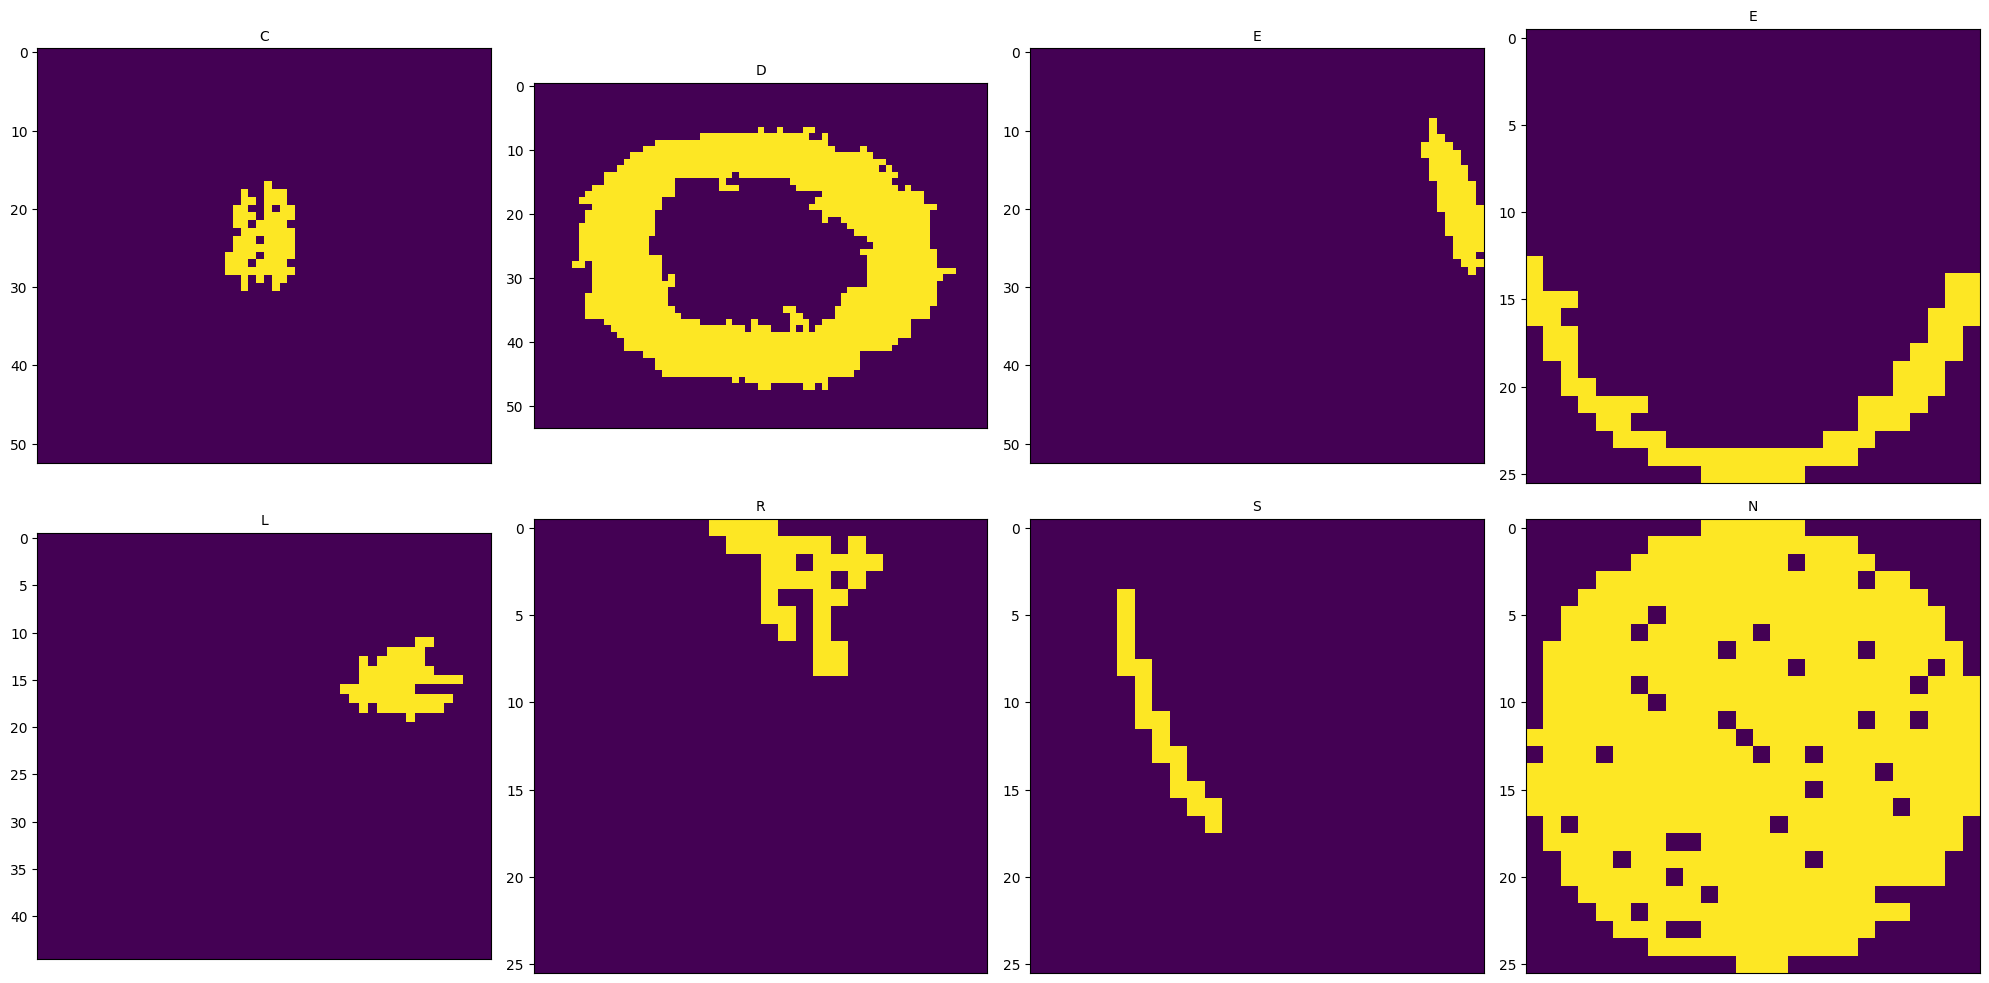

In [36]:
x = [9,340, 3, 16, 0, 25, 84, 37]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

fig, ax = plt.subplots(nrows = 2, ncols = 4,figsize=(20, 10))
ax = ax.ravel(order='C')
for i in range(8):
    img = df_withpattern_copy.waferMap[x[i]]
    zero_img = np.zeros(img.shape)
    img_labels = measure.label(img, connectivity=1, background=0) # neighbors=4 부분만 삭제
    img_labels = img_labels-1
    if img_labels.max()==0:
        no_region = 0
    else:
        info_region = stats.mode(img_labels[img_labels>-1], axis = None)
        no_region = info_region[0]
    
    zero_img[np.where(img_labels==no_region)] = 2 
    ax[i].imshow(zero_img)
    ax[i].set_title(df_withpattern_copy.failureType[x[i]][0][0],fontsize=10)
    ax[i].set_xticks([])
plt.tight_layout()
plt.show() 

In [40]:
# 특정 좌표 x,y 와 이미지 중심까지 거리 계산 -> 이미지에서 특정 지점이 중심으로부터 얼마나 떨어져 있는지를 측정
def cal_dist(img,x,y):
    dim0=np.size(img,axis=0)    
    dim1=np.size(img,axis=1)
    dist = np.sqrt((x-dim0/2)**2+(y-dim1/2)**2)
    return dist  

In [47]:
from scipy import stats
from skimage import measure

# (cal_dist 함수는 그대로 둡니다)

def fea_geom(img):
    norm_area=img.shape[0]*img.shape[1]
    norm_perimeter=np.sqrt((img.shape[0])**2+(img.shape[1])**2)
    
    img_labels = measure.label(img, connectivity=1, background=0)

    if img_labels.max()==0:
        img_labels[img_labels==0]=1
        no_region = 0
    else:
        # ★★★★★ 이 부분이 수정되었습니다 ★★★★★
        # 1. stats.mode 결과를 info_region 객체로 받습니다.
        info_region = stats.mode(img_labels[img_labels>0], axis=None)
        # 2. info_region.mode 로 최빈값을 직접 가져옵니다.
        no_region = info_region.mode - 1
        # ★★★★★★★★★★★★★★★★★★★★★★★★★★★
    
    prop = measure.regionprops(img_labels.astype(int))
    
    # 만약 no_region이 배열 형태로 반환될 경우를 대비해 스칼라 값으로 만듭니다.
    if hasattr(no_region, "__len__"):
        no_region = no_region[0]
        
    prop_area = prop[no_region].area/norm_area
    prop_perimeter = prop[no_region].perimeter/norm_perimeter 
    
    prop_cent = prop[no_region].local_centroid 
    prop_cent = cal_dist(img,prop_cent[0],prop_cent[1])
    
    prop_majaxis = prop[no_region].major_axis_length/norm_perimeter 
    prop_minaxis = prop[no_region].minor_axis_length/norm_perimeter  
    prop_ecc = prop[no_region].eccentricity  
    prop_solidity = prop[no_region].solidity  
    
    return prop_area, prop_perimeter, prop_majaxis, prop_minaxis, prop_ecc, prop_solidity

In [48]:
# 수정된 함수로 다시 apply 실행
df_withpattern_copy['fea_geom'] = df_withpattern_copy.waferMap.apply(fea_geom)

In [49]:
df_withpattern_copy.fea_geom[340]

(np.float64(0.30881585811163276),
 np.float64(3.4633305623147477),
 np.float64(0.7464951525564261),
 np.float64(0.5214489845402435),
 0.7155811292862498,
 np.float64(0.6103092783505155))

In [50]:
df_withpattern_copy.head(2)

,index,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim,failureNum,trainTestNum,fea_reg,new_waferMap,fea_cub_mean,fea_cub_std,fea_geom
0,19,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,Loc,"(45, 48)",4.0,0.0,"[3.4722222222222223, 13.703703703703704, 3.472...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[8.215024391397317e-05, 0.00010463980628879118...","[4.0417074098845694e-05, 6.363021854617116e-05...","(0.027314814814814816, 0.5954493227790636, 0.1..."
1,36,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,Training,Edge-Loc,"(53, 58)",2.0,0.0,"[6.0344827586206895, 11.05121293800539, 5.1724...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.00021095362146780387, 0.0002345828725981230...","[0.00014887071778255933, 0.0001421232925195758...","(0.01626545217957059, 0.42137276857016587, 0.2..."


In [51]:
df_all=df_withpattern_copy.copy()
a=[df_all.fea_reg[i] for i in range(df_all.shape[0])] #13
b=[df_all.fea_cub_mean[i] for i in range(df_all.shape[0])] #20
c=[df_all.fea_cub_std[i] for i in range(df_all.shape[0])] #20
d=[df_all.fea_geom[i] for i in range(df_all.shape[0])] #6
fea_all = np.concatenate((np.array(a),np.array(b),np.array(c),np.array(d)),axis=1) #59 in total

In [52]:
fea_all.shape

(25519, 59)

In [53]:
label=[df_all.failureNum[i] for i in range(df_all.shape[0])]
label=np.array(label)

label

array([4., 2., 2., ..., 3., 2., 3.], shape=(25519,))

In [54]:
len(label)

25519

In [55]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from collections import  Counter

# feature 데이터와 정답 데이터 분류하고 훈련데이터와 테스트데이터 분류 
X = fea_all
y = label

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)                      
print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

RANDOM_STATE =42

Training target statistics: Counter({np.float64(3.0): 7299, np.float64(2.0): 3860, np.float64(0.0): 3238, np.float64(4.0): 2677, np.float64(6.0): 905, np.float64(5.0): 640, np.float64(1.0): 404, np.float64(7.0): 116})
Testing target statistics: Counter({np.float64(3.0): 2381, np.float64(2.0): 1329, np.float64(0.0): 1056, np.float64(4.0): 916, np.float64(6.0): 288, np.float64(5.0): 226, np.float64(1.0): 151, np.float64(7.0): 33})


In [56]:
# One-Vs-One
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier

In [57]:
clf2 = OneVsOneClassifier(LinearSVC(random_state = RANDOM_STATE)).fit(X_train, y_train)

In [58]:
y_train_pred = clf2.predict(X_train)
y_test_pred = clf2.predict(X_test)

train_acc2 = np.sum(y_train == y_train_pred, axis=0, dtype='float') / X_train.shape[0]
test_acc2 = np.sum(y_test == y_test_pred, axis=0, dtype='float') / X_test.shape[0]

print('One-Vs-One Training acc: {}'.format(train_acc2*100)) #One-Vs-One Training acc: 80.36
print('One-Vs-One Testing acc: {}'.format(test_acc2*100)) #One-Vs-One Testing acc: 79.04

One-Vs-One Training acc: 82.73159517216155
One-Vs-One Testing acc: 82.3667711598746


In [59]:
# 평가하기
print(classification_report(y_train, y_train_pred))
print('Acc Score :', accuracy_score(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92      3238
         1.0       0.85      0.79      0.82       404
         2.0       0.69      0.72      0.71      3860
         3.0       0.92      0.94      0.93      7299
         4.0       0.68      0.64      0.66      2677
         5.0       0.91      0.87      0.89       640
         6.0       0.69      0.52      0.59       905
         7.0       0.97      0.99      0.98       116

    accuracy                           0.83     19139
   macro avg       0.83      0.80      0.81     19139
weighted avg       0.82      0.83      0.83     19139

Acc Score : 0.8273159517216155


In [60]:
# 평가하기
print(classification_report(y_test, y_test_pred))
print('Acc Score :', accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      1056
         1.0       0.83      0.79      0.81       151
         2.0       0.69      0.72      0.70      1329
         3.0       0.91      0.93      0.92      2381
         4.0       0.68      0.65      0.66       916
         5.0       0.93      0.89      0.91       226
         6.0       0.68      0.56      0.61       288
         7.0       0.92      1.00      0.96        33

    accuracy                           0.82      6380
   macro avg       0.82      0.81      0.81      6380
weighted avg       0.82      0.82      0.82      6380

Acc Score : 0.8236677115987461


In [61]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')  

Confusion matrix, without normalization
Normalized confusion matrix


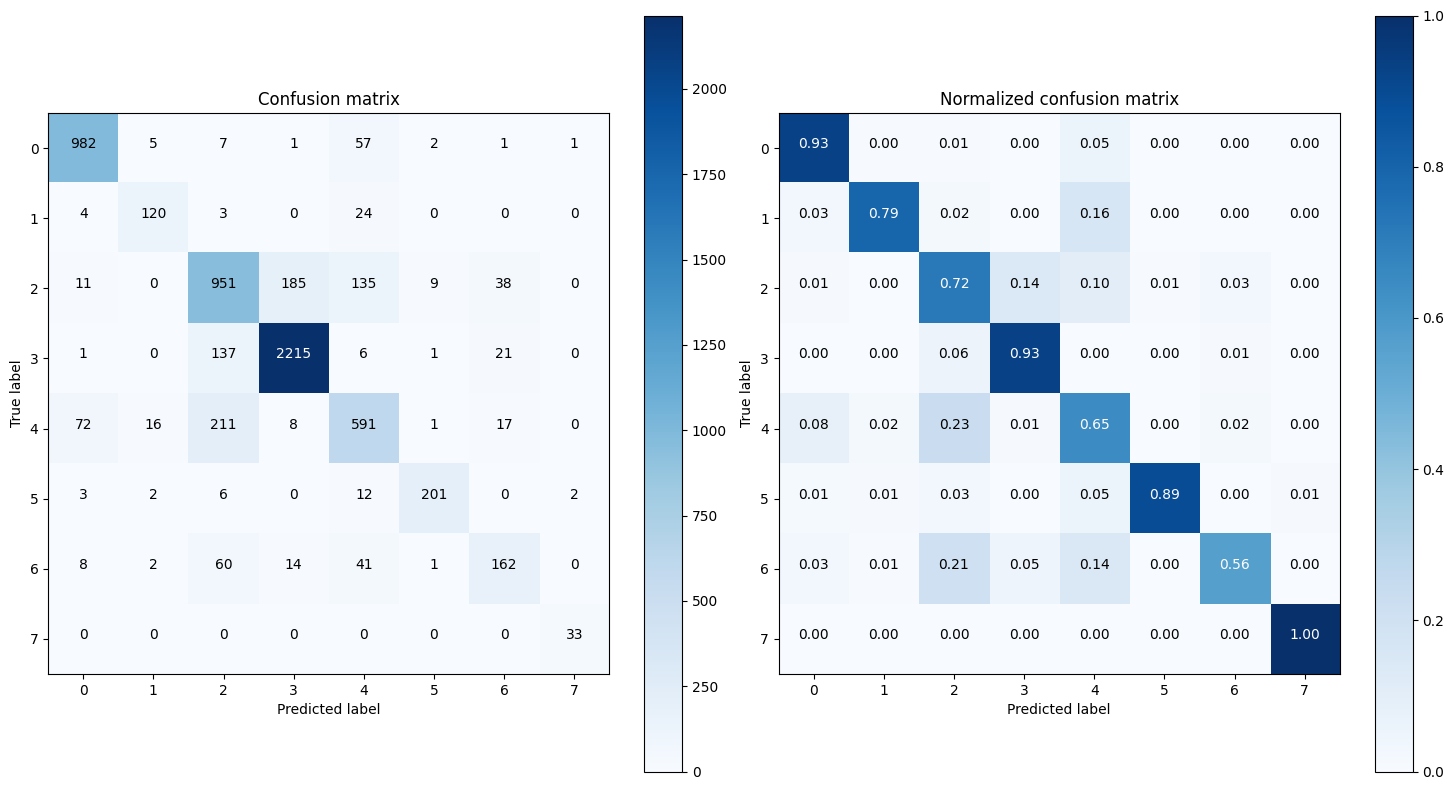

In [62]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred)
# np.set_printoptions(precision=2)

from matplotlib import gridspec
fig = plt.figure(figsize=(15, 8)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 

## Plot non-normalized confusion matrix
plt.subplot(gs[0])
plot_confusion_matrix(cnf_matrix, title='Confusion matrix')

# Plot normalized confusion matrix
plt.subplot(gs[1])
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix')

plt.tight_layout()
plt.show()